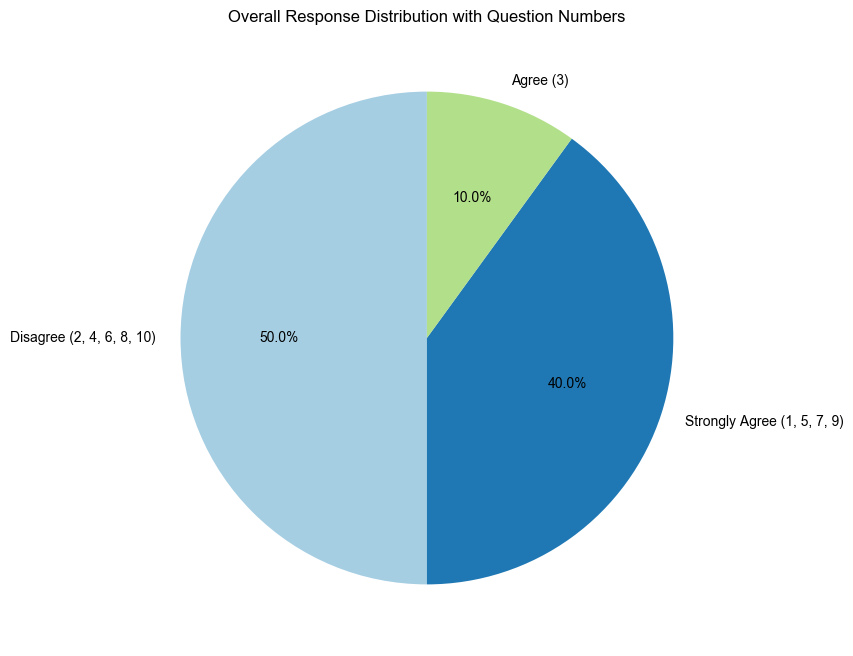

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载 CSV 文件
file_path = "2.csv"  # 修改为实际文件路径
df = pd.read_csv(file_path)

# 删除不必要的列（如 Timestamp 和 Email Address）
feedback_df = df.drop(columns=["Timestamp", "Email Address"])

# 提取问题序号和内容
questions = feedback_df.columns
question_mapping = {i+1: question for i, question in enumerate(questions)}

# 将所有响应展开为单个序列，包含问题序号
all_responses = []
for col_index, col in enumerate(feedback_df.columns, start=1):
    for response in feedback_df[col]:
        if pd.notna(response):  # 忽略空值
            all_responses.append((col_index, response))

# 转换为 DataFrame，统计每个响应类型的总数
responses_df = pd.DataFrame(all_responses, columns=["Question", "Response"])
response_counts = responses_df["Response"].value_counts()

# 创建带问题编号的标签
response_labels = []
for response_type in response_counts.index:
    questions_with_response = responses_df[responses_df["Response"] == response_type]["Question"].unique()
    question_numbers = ", ".join(map(str, questions_with_response))
    response_labels.append(f"{response_type} ({question_numbers})")

# 绘制饼图
plt.figure(figsize=(10, 8))
response_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=response_labels,  # 使用带问题编号的标签
    colors=plt.cm.Paired.colors
)
plt.title("Overall Response Distribution with Question Numbers")
plt.ylabel("")  # 移除默认的 y 轴标签
plt.show()
